Agnieszka Kowalska
Python 3.12.8


Celem projektu jest analiza danych dotyczących udaru mózgu, znajdujących się w pliku `healthcare-dataset-stroke-data.csv`. Wyniki należy przedstawić w formie  raportu (RMarkdown, Jupyter, etc.) zawierającego kod programu jak i opisy dokonywanych decyzji. Analiza powinna zawierać co najmniej następujące punkty:

1. Czyszczenie danych (usuwanie/inputacja braków danych, naprawa błędów, transformacje danych, rozwiązanie problemu wartości odstających)
2. Eksploracyjna analiza danych
3. Zamodelowanie zmiennej `stroke` na podstawie pozostałych zmiennych. Minimum 3 modele.
4. Ewaluacja na zbiorze testowym (wybór modelu i metryk z uzasadnieniem)

Możliwe jest rozwiązaniem w języku R lub Python. Rozwiązania wysłać do 24.01.2024 na adres mailowy: michalmaj116@gmail.com z tytułem "studia podyplomowe"


In [1]:
#PS pip install pandas
#PS pip install numpy 
#PS pip install scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# loading data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
pd.set_option('display.width', 300)
print(df)

         id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0      9046    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1     51676  Female  61.0             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2     31112    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3     60182  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4      1665  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
...     ...     ...   ...           ...            ...          ...            ...            ...               

## 1. Czyszczenie i eksploracja danych

In [2]:
df.info()
round(df.describe(include='all'), 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.00,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.83,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,21161.72,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,67.00,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17741.25,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,36932.00,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54682.00,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


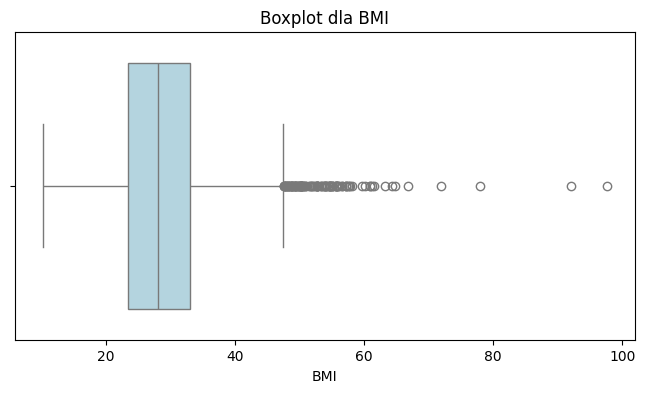

In [3]:
# analiza wartości odstających, czy BMI moze być na poziomie 97.60 ?
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title("Boxplot dla BMI")
plt.xlabel("BMI")
plt.show()

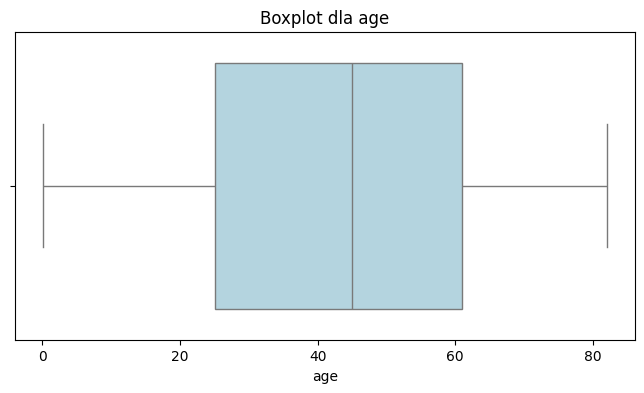

In [4]:
# analiza wartości odstających, czy wiek jest poprany?
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'], color='lightblue')
plt.title("Boxplot dla age")
plt.xlabel("age")
plt.show()

In [5]:
# brakujące dane - BMI
if 'bmi' in df.columns:
    median_bmi = round(df['bmi'].median(), 2)
    df['bmi'] = df['bmi'].fillna(median_bmi)

# sprawdzenie braków
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


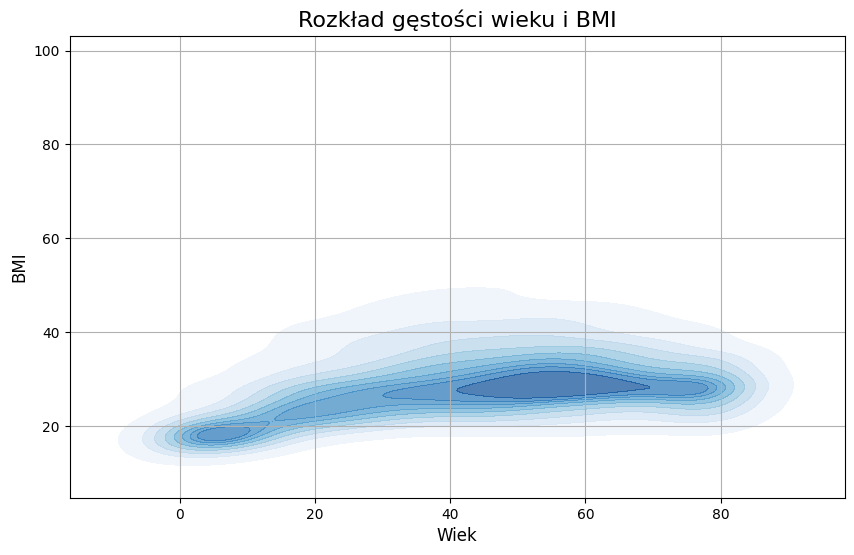

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='age', y='bmi', data=df, cmap='Blues', fill=True, alpha=0.7)
plt.title("Rozkład gęstości wieku i BMI", fontsize=16)
plt.xlabel("Wiek", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.grid(True)
plt.show()

C:\Users\agnie\AppData\Local\Temp\ipykernel_8216\3259257493.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='bmi', data=df, palette='coolwarm')


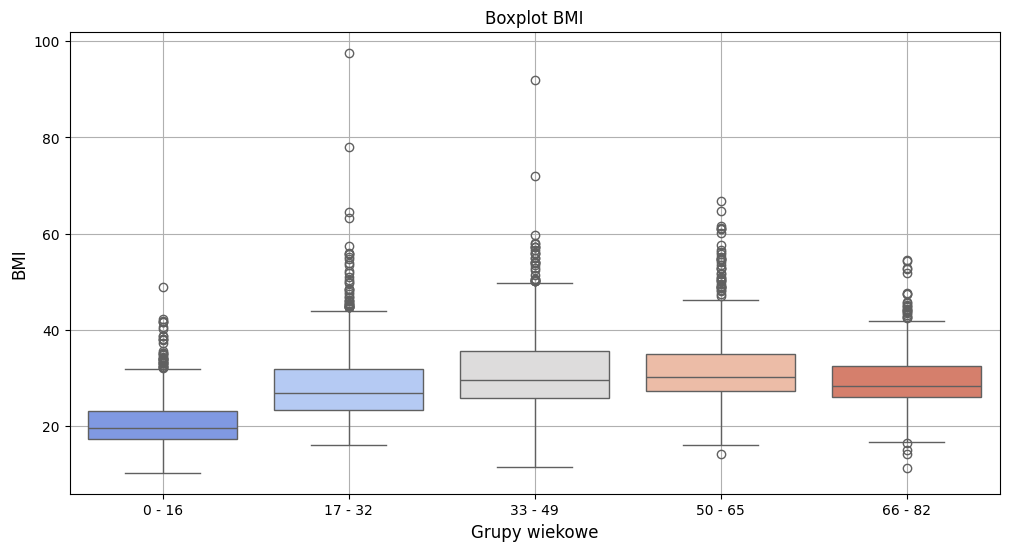

In [7]:
age_bins = [0, 16, 32, 49, 65, 82]
age_bins_labels = ['0 - 16', '17 - 32', '33 - 49', '50 - 65', '66 - 82']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_bins_labels, right=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='bmi', data=df, palette='coolwarm')
plt.title("Boxplot BMI", fontsize=12)
plt.xlabel("Grupy wiekowe", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.grid(True)
plt.show()

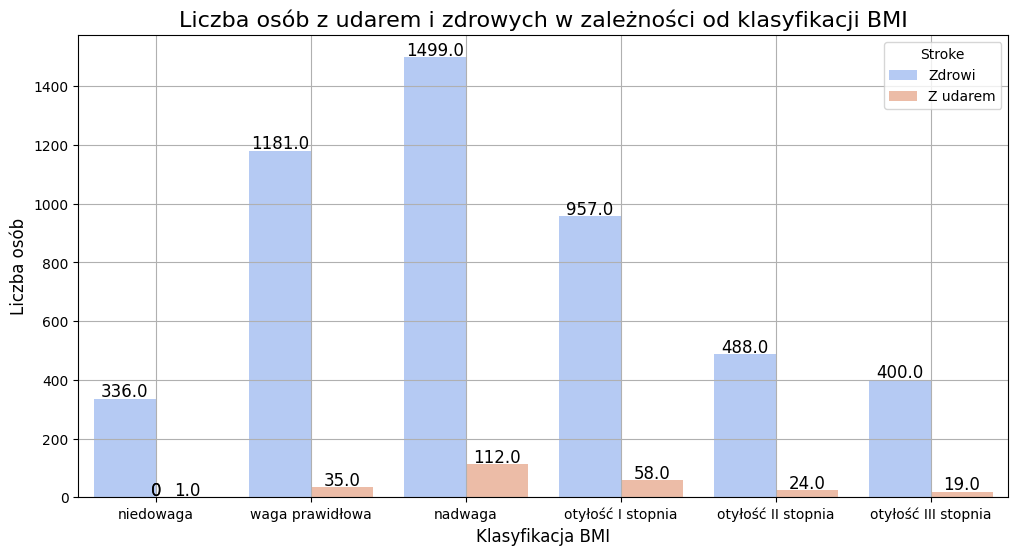

In [8]:
bmi_bins = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['niedowaga', 'waga prawidłowa', 'nadwaga', 'otyłość I stopnia', 
              'otyłość II stopnia', 'otyłość III stopnia']


df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='bmi_category', hue='stroke', data=df, palette='coolwarm')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Liczba osób z udarem i zdrowych w zależności od klasyfikacji BMI", fontsize=16)
plt.xlabel("Klasyfikacja BMI", fontsize=12)
plt.ylabel("Liczba osób", fontsize=12)
plt.legend(title='Stroke', labels=['Zdrowi', 'Z udarem'])
plt.grid(True)

plt.show()

Generating plot for categorical column: gender
gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64


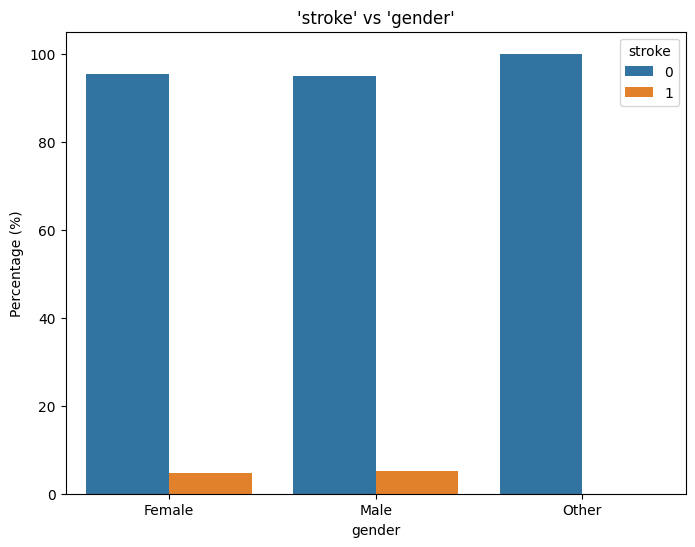

Generating plot for categorical column: hypertension
hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
dtype: int64


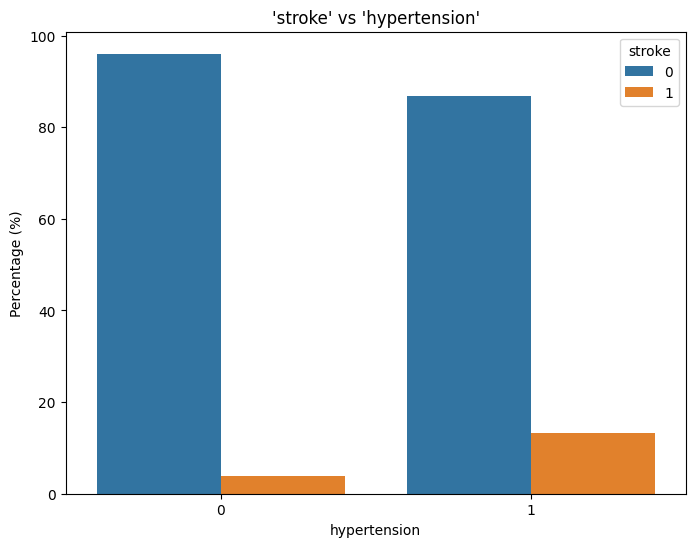

Generating plot for categorical column: heart_disease
heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
dtype: int64


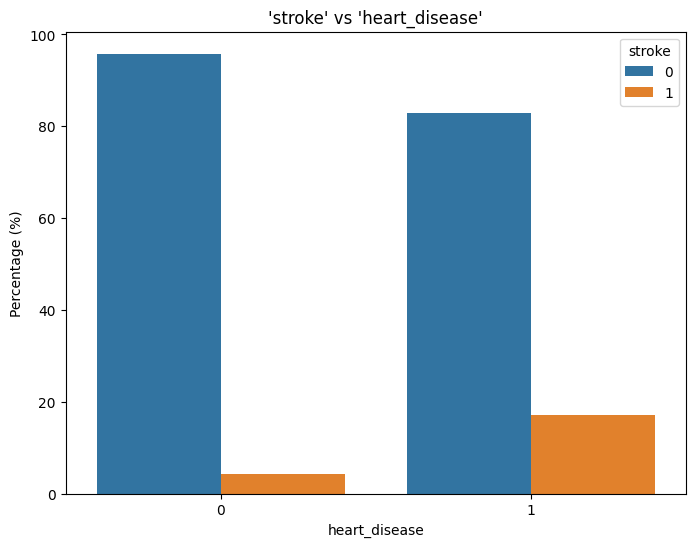

Generating plot for categorical column: ever_married
ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64


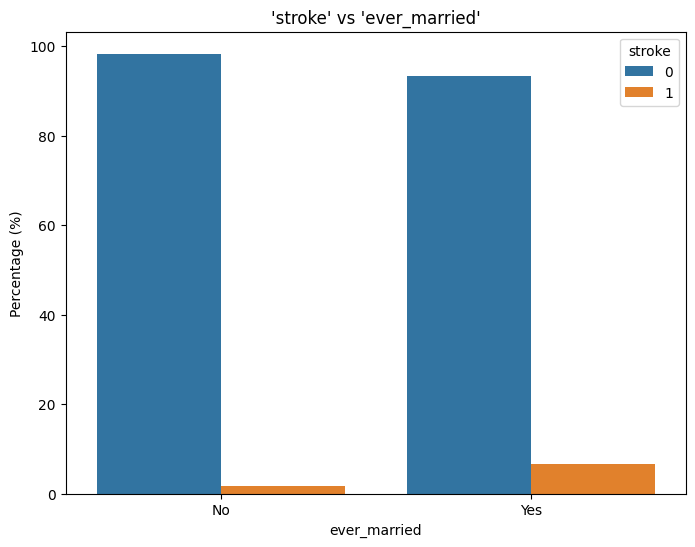

Generating plot for categorical column: work_type
work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
dtype: int64


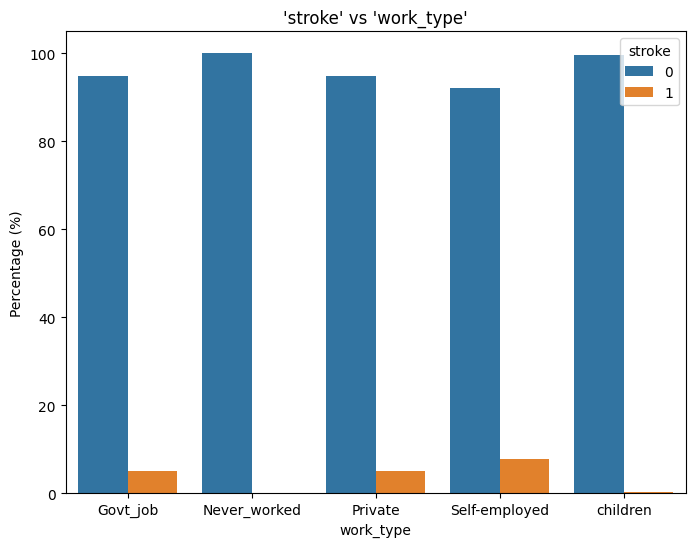

Generating plot for categorical column: smoking_status
smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
dtype: int64


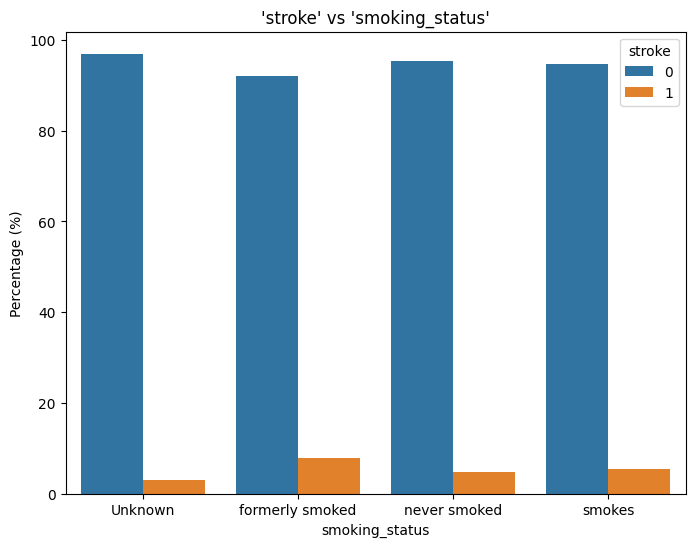

Generating plot for numeric column: age


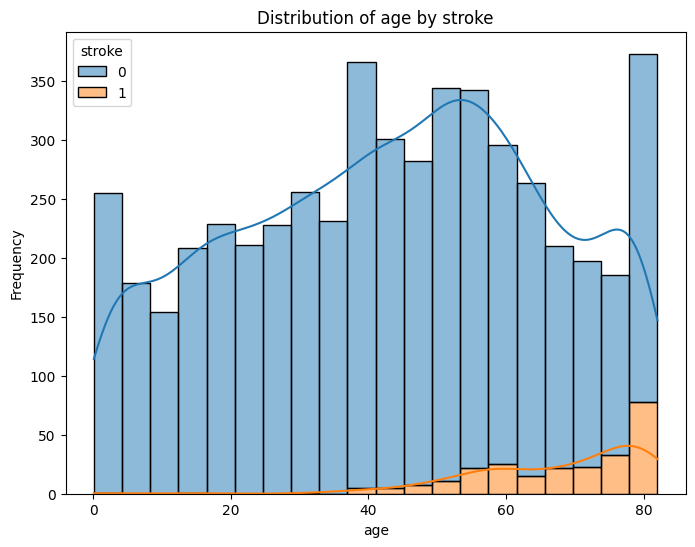

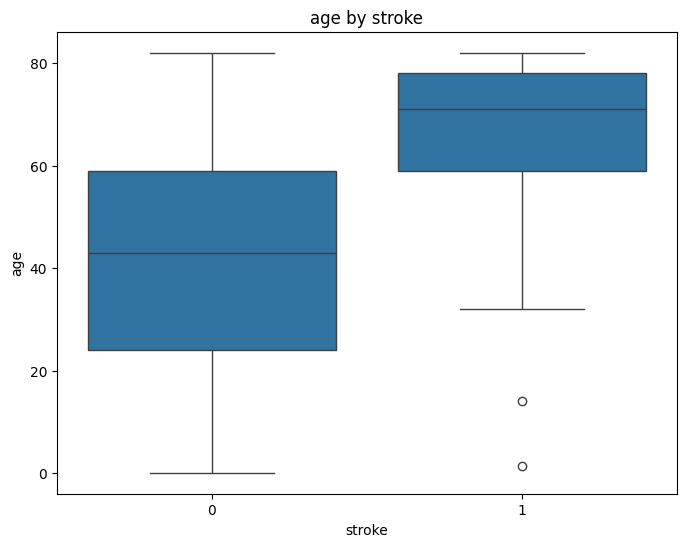

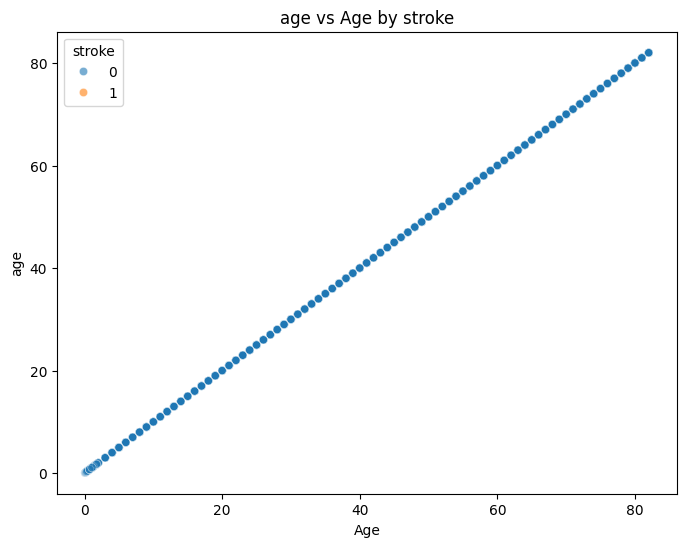

Generating plot for numeric column: bmi


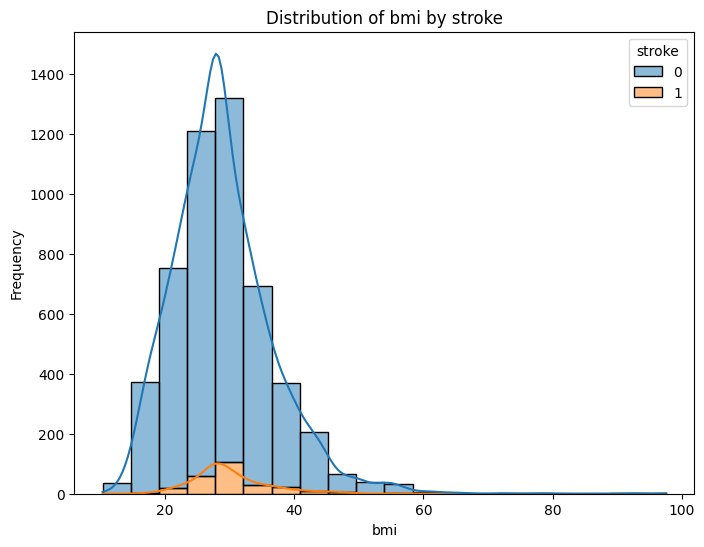

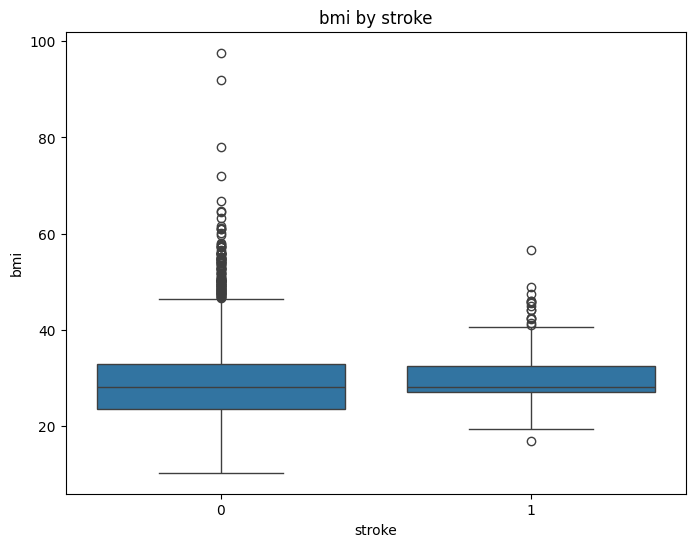

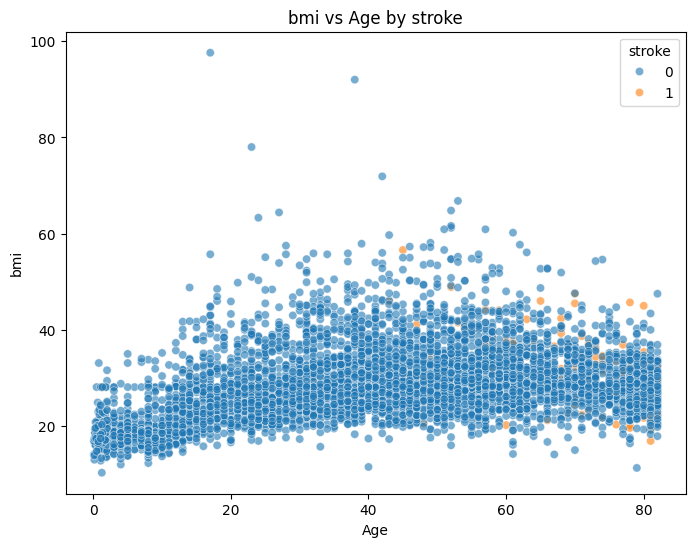

In [9]:
# Analiza zależności między zmiennymi a zmienną celu (stroke)


def generate_plots_and_tables_by_target(df: pd.DataFrame, target_column: str = "stroke",
                                        numeric_cols: list = ['age', 'bmi'], 
                                        categorical_cols: list = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']) -> None:
    
    # For categorical columns: Barplot
    for column in categorical_cols:
        print(f"Generating plot for categorical column: {column}")
        
        plt.figure(figsize=(8, 6))
            
        # Group by target and categorical column, then compute percentages
        counts = df.groupby([column, target_column], group_keys=True).size()
        print(counts)
        
        # Normalize the counts to percentages
        counts_norm = counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())
        counts_norm = counts_norm.reset_index(name='percent')
        
        # Plot the barplot
        sns.barplot(x=column, y='percent', hue=target_column, data=counts_norm)
        plt.title(f"'{target_column}' vs '{column}'")
        plt.xlabel(column)
        plt.ylabel('Percentage (%)')
        plt.show()

    # For numeric columns: Histograms, Boxplots, and Scatter Plots
    for column in numeric_cols:
        print(f"Generating plot for numeric column: {column}")
        
        # Histogram
        plt.figure(figsize=(8, 6))
        sns.histplot(df, x=column, hue=target_column, kde=True, multiple='stack', bins=20)
        plt.title(f"Distribution of {column} by {target_column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        # Boxplot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f"{column} by {target_column}")
        plt.xlabel(target_column)
        plt.ylabel(column)
        plt.show()
        
        # Scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='age', y=column, hue=target_column, data=df, alpha=0.6)
        plt.title(f"{column} vs Age by {target_column}")
        plt.xlabel('Age')
        plt.ylabel(column)
        plt.show()

# Wywołania funkcji
generate_plots_and_tables_by_target(df, target_column='stroke', 
                                    numeric_cols=['age', 'bmi'], 
                                    categorical_cols=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status'])


## 2. Zamodelowanie zmiennej `stroke` na podstawie pozostałych zmiennych. Minimum 3 modele.